In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
tesla = pd.read_csv('TSLA.csv')

In [3]:
# check 1st 5 rows
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# check last 5 rows
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
# Check columns -> 

tesla.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# check the number of rows and columns in the dataset -> 

tesla.shape

(2416, 7)

In [7]:
# More understanding of the dataset -> 

tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [8]:
# check datatypes of all the columns -> 

tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# Let's replace the empty strings with NaN values

tesla = tesla.replace(' ', np.nan)

In [10]:
# Let's replace the question marks (?) with NaN values

tesla = tesla.replace('?', np.nan)

In [11]:
# Let's replace the question marks (?) with NaN values

tesla = tesla.replace('.', np.nan)

In [12]:
# determine the number of unique categories in each variable: 

tesla.nunique()

Date         2416
Open         2132
High         2128
Low          2136
Close        2225
Adj Close    2225
Volume       2391
dtype: int64

Text(0.5, 1.0, 'Cardinality')

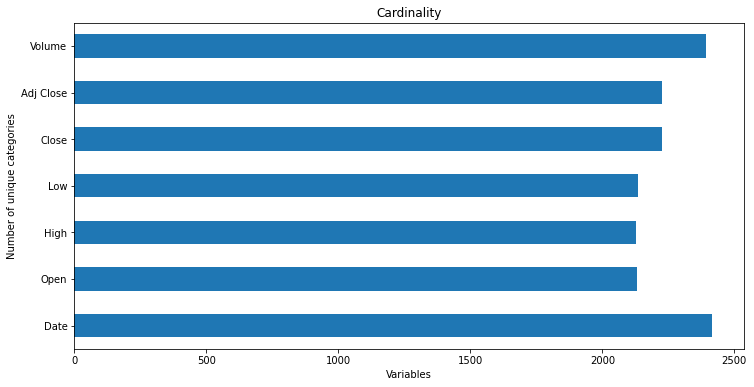

In [14]:
# plot the cardinality:

tesla.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [15]:
# display categorical features/columns -> 

categorical_columns = tesla.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Date'], dtype='object')

In [16]:
# display numerical features/columns -> 

numerical_columns = tesla.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
# check the count of features/ non-null values in each column -> 

tesla.count()

Date         2416
Open         2416
High         2416
Low          2416
Close        2416
Adj Close    2416
Volume       2416
dtype: int64

In [19]:
# check summary statistics of all numerical columns -> 

tesla.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2416.0,1.862711e+02,1.187402e+02,16.139999,3.434250e+01,2.130350e+02,2.664500e+02,6.736900e+02
High,2416.0,1.895782e+02,1.208923e+02,16.629999,3.489750e+01,2.167450e+02,2.709275e+02,7.861400e+02
Low,2416.0,1.829166e+02,1.168576e+02,14.980000,3.358750e+01,2.088700e+02,2.621025e+02,6.735200e+02
Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Adj Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Volume,2416.0,5.572722e+06,4.987809e+06,118500.000000,1.899275e+06,4.578400e+06,7.361150e+06,4.706500e+07


In [20]:
# check for duplicate rows in the dataset -> 

tesla.duplicated().sum()

0

In [21]:
# check missing values -> 

tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
# print names or check all columns which have null values -> 

[val for val in tesla.columns if tesla[val].isnull().sum() > 0]

[]

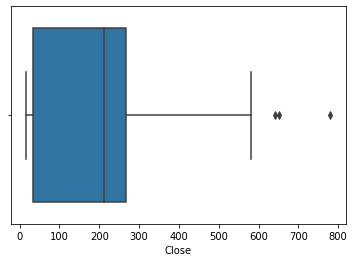

In [30]:
# checking of outlier using boxplot for one numerical column

sns.boxplot(x=tesla['Close'])
plt.show()

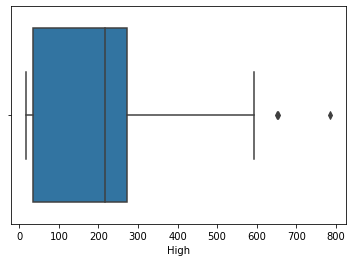

In [31]:
sns.boxplot(x=tesla['High'])
plt.show()

In [32]:
# Checking correlation - how features are correlated

tesla.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


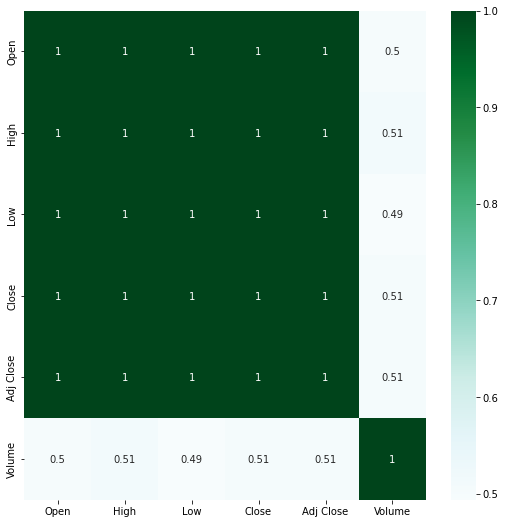

In [40]:
# then plot the correlation of the top most correlated features:

plt.figure(figsize=(9,9))
e = tesla.corr()
top_correlated_features = e.index
g = sns.heatmap(tesla[top_correlated_features].corr(), annot=True, cmap='BuGn')

`Featue Engineering`

In [41]:
# we don't need Date column for our model, drop it

tesla.drop(
    columns=['Date'], inplace=True
)

In [42]:
tesla.sample(n=2)

,Open,High,Low,Close,Adj Close,Volume
446,35.270000,35.490002,34.689999,35.00,35.00,4481800
86,21.139999,21.850000,21.049999,21.84,21.84,280600


In [43]:
# Adj Close and Close have the same values, drop them:

tesla.drop(
    columns=['Close', 'Adj Close'], inplace=True
)

In [44]:
tesla.sample(n=2)

,Open,High,Low,Volume
1437,214.270004,218.970001,211.500000,3180500
660,38.450001,38.869999,37.290001,2261300


`Open, High, Low` - independent features

`Volume` - dependent features 

In [45]:
# divide dataset into independent and dependent features

# independent features
X = tesla.iloc[:,:-1]

In [46]:
X.head()

,Open,High,Low
0,19.000000,25.00,17.540001
1,25.790001,30.42,23.299999
2,25.000000,25.92,20.270000
3,23.000000,23.10,18.709999
4,20.000000,20.00,15.830000


In [47]:
# dependent feature

y = tesla.iloc[:,-1]

In [48]:
y.head()

0    18766300
1    17187100
2     8218800
3     5139800
4     6866900
Name: Volume, dtype: int64

In [49]:
y.name

'Volume'

[0.28491478 0.36871446 0.34637076]


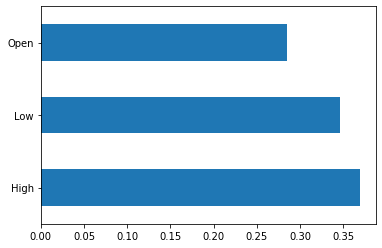

In [53]:
# Check the feature importances

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

# plot the graph of feature importances for better visualizations

f_importance = pd.Series(model.feature_importances_, index=X.columns)
f_importance.nlargest(5).plot(kind='barh') # if there are many features pick the top 5
plt.show()

In [82]:
# train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [83]:
X_train.shape

(1691, 3)

In [84]:
X_test.shape

(725, 3)

`Model Training`

In [87]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [88]:
regression.fit(X_train, y_train)

LinearRegression()

In [89]:
# print coefficients
print(regression.coef_)

[  8767835.59092379  76030193.96248762 -82421293.51216346]


In [90]:
# intercept
print(regression.intercept_)

5671143.287995267


In [91]:
# on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

`prediction`

In [92]:
reg_pred = regression.predict(X_test)

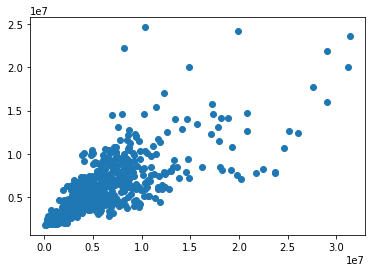

In [93]:
# plot y-test/reg_pred

plt.scatter(y_test, reg_pred)

In [94]:
residuals = y_test - reg_pred

In [95]:
residuals

410    -1.208220e+06
199    -8.784065e+05
1670    1.305744e+05
1934   -2.880209e+06
1036    1.572478e+06
            ...     
270    -1.470484e+06
1041   -1.061913e+05
1047    2.271307e+05
1292    1.991208e+06
2405    5.133269e+06
Name: Volume, Length: 725, dtype: float64

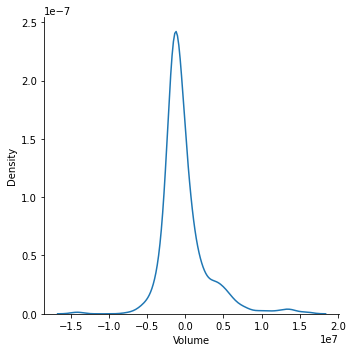

In [96]:
# plot this residuals
sns.displot(residuals, kind='kde')

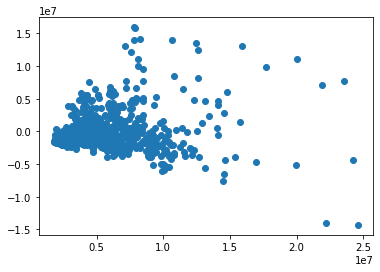

In [97]:
# scatter plot with respect to prediction and residuals
plt.scatter(reg_pred, residuals)

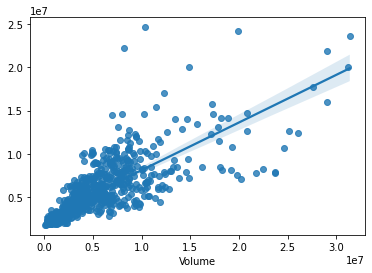

In [98]:
sns.regplot(x=y_test, y=reg_pred, data=tesla)
plt.show()

In [99]:
# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

2077260.429597282
9391365033804.984
3064533.4120882065


In [100]:
# evaluation -> R squared, adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.5951862820715876


                60% accuracy

In [101]:
# adjusted R square
# adjusted R square should be less than r2_score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5935018976696663

======

`Deployment`

In [71]:
import pickle

In [72]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [73]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

=====